# Метод ближайших соседей

Для начала подключим библиотеки, которые нам понадобятся.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Загрузим данные в наш ноутбук. 

In [3]:
data = pd.read_csv('C:\\StudentsPerformance.csv', sep=',')
# Посмотрим на несколько записей из набора данных
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Добавим целевую переменную. Сдал ли студент экзамен по математике. Как условие поставим проходной балл 60

In [4]:
def math(mathscore):
    if mathscore >= 60:
        return 1
    return 0

data['math pass'] = data['math score'].apply(math)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   math pass                    1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB




Из нашей выборки выбросим результаты по математике.

In [6]:
data = data.drop(['math score'], axis='columns')

In [7]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math pass
0,female,group B,bachelor's degree,standard,none,72,74,1
1,female,group C,some college,standard,completed,90,88,1
2,female,group B,master's degree,standard,none,95,93,1
3,male,group A,associate's degree,free/reduced,none,57,44,0
4,male,group C,some college,standard,none,78,75,1
5,female,group B,associate's degree,standard,none,83,78,1
6,female,group B,some college,standard,completed,95,92,1
7,male,group B,some college,free/reduced,none,43,39,0
8,male,group D,high school,free/reduced,completed,64,67,1
9,female,group B,high school,free/reduced,none,60,50,0


Посмотрим, можем ли мы выбросить еще какие-нибудь признаки из нашей таблицы. Это стоит делать, поскольку чем меньше признаков - тем легче вычислять расстояние между объектами, то есть алгоритм будет работать быстрее. Посмотрим на корреляцию признаков между собой. Построим графическое представление модуля значения корреляции попарно между признаками.

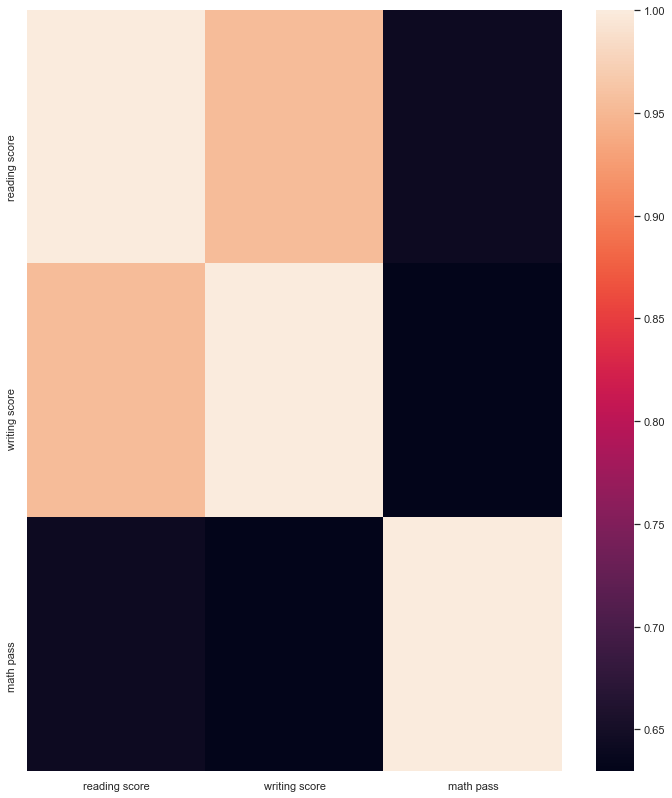

In [9]:
# Картинку отрисуем с помощью библиотеки seaborn
import seaborn as sns
# Подсчитаем корреляцию и возьмем модуль от нее
corr = data.corr().abs()
# Следующая команда устанавливает размер картинки (по умолчанию она довольно маленькая)
sns.set(rc={'figure.figsize':(12, 14)})
# Нарисуем картинку
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png)

Удалим из выборки признаки, высоко коррелирующие с другими признаками. В нашем случае баллы за чтение и письмо сильно взаимосвязаны

In [10]:
data = data.drop(['reading score'], axis='columns')

In [11]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,writing score,math pass
0,female,group B,bachelor's degree,standard,none,74,1
1,female,group C,some college,standard,completed,88,1
2,female,group B,master's degree,standard,none,93,1
3,male,group A,associate's degree,free/reduced,none,44,0
4,male,group C,some college,standard,none,75,1


Видим несколько колонок текстовых переменных. Посмотрим, сколько всего таких - выведем типы данных в каждой колонке.

In [12]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
writing score                   int64
math pass                       int64
dtype: object

Текстовые признаки математическим методом не обработаешь. Посмотрим на значения, которые они принимают, чтобы придумать, что с ними делать.

In [13]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [14]:
def ch(gender):
    if gender == 'male':
        return 1
    return 0

data['gender'] = data['gender'].apply(ch)


Заменили пацанчиков на 1, а девчоночек на 0

Далее заменим все признаки на численное значение

In [15]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [16]:
def cha(race):
    if race == 'group A':
        return 0
    if race == 'group B':
        return 1
    if race == 'group C':
        return 2
    if race == 'group D':
        return 3
    return 4

data['race/ethnicity'] = data['race/ethnicity'].apply(cha)

In [17]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [18]:
def chan(edu):
    if edu == 'some college':
        return 0
    if edu == "associate's degree":
        return 1
    if edu == 'high school':
        return 2
    if edu == 'some high school':
        return 3
    if edu == "bachelor's degree":
        return 4
    return 5

data['parental level of education'] = data['parental level of education'].apply(chan)

In [19]:
data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [20]:
def chang(lunch):
    if lunch == 'standard':
        return 1
    return 0

data['lunch'] = data['lunch'].apply(chang)


In [21]:
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [22]:
def change(test):
    if test == 'completed':
        return 1
    return 0

data['test preparation course'] = data['test preparation course'].apply(change)

Посмотрим, что получилось 

In [23]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,writing score,math pass
0,0,1,4,1,0,74,1
1,0,2,0,1,1,88,1
2,0,1,5,1,0,93,1
3,1,0,1,0,0,44,0
4,1,2,0,1,0,75,1


Поделим выборку

In [24]:
X = data[data.columns[:-1]]
y = data['math pass']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

Пропущенных значений нет.

In [25]:
data.isna().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
writing score                  False
math pass                      False
dtype: bool

## Настало время machine learning

Пора заняться делом. Будем проводить классификацию с помощью метода ближайших соседей.

In [26]:
# импортируем класс классификатора по ближайшим соседям
from sklearn.neighbors import KNeighborsClassifier

# создадим наш классификатор. Гиперпараметр у этого алгоритма один - количество соседей.
clf = KNeighborsClassifier(n_neighbors=5)
# обучим классификатор на тренировочной выборке
clf.fit(X_train, y_train)
# подсчитаем долю верных ответов алгоритма на тестовой выборке.
# Есть и другие метрики качества - о них будет рассказано на следующей лабе
clf.score(X_test, y_test)

0.852

Посмотрим, как влияет гиперпараметр на качество классификации.

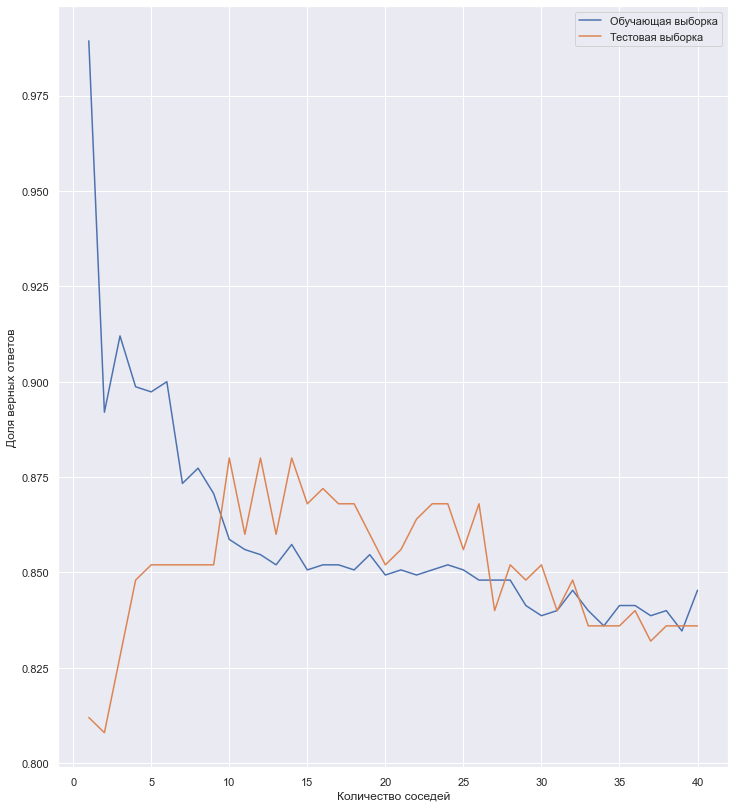

In [28]:
# Создадим пустой словарь. Будем добавлять в него значения наших "скоров". Ключами будет значение гиперпараметра,
# значениями - качество работы. Рассмотрим отдельно качество на тренировочной выборке и на тестовой.
train_scores = {}
test_scores = {}

# для n в диапазоне от 1 до 40 включительно
for n in range(1, 41):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    # значение качества на текущей итерации:
    current_train_score = clf.score(X_train, y_train)
    current_test_score = clf.score(X_test, y_test)
    # запишем его в наши словари
    train_scores[n] = current_train_score
    test_scores[n] = current_test_score

# нарисуем графики

plt.plot(list(train_scores.keys()), list(train_scores.values()), label='Обучающая выборка')
plt.plot(list(test_scores.keys()), list(test_scores.values()), label='Тестовая выборка')
plt.xlabel('Количество соседей')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Исходя из полученных данных, можно сделать вывод, что при количестве соседей 10, 12, 14 мы получаем наилучшую точность